In [1]:
import requests
import json
import numpy as np
import pandas as pd
import nltk
import matplotlib
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer


In [2]:
#Task 1: Identify a suitable web API

In [3]:
url = 'https://newsapi.org/v2/everything?'

In [4]:
api_key = '8fecb1834e3a417aae43429e67446bd8'

In [5]:
# function to take raw data from the API and process it into a list inorder to trnasform it into a pandas dataframe
def get_articles(file):
    article_results = []
    for i in range(len(file)):
        article_dict = {}
        article_dict['title'] = file[i]['title']
        article_dict['author'] = file[i]['author']
        article_dict['source'] = file[i]['source']
        article_dict['description'] = file[i]['description']
        article_dict['content'] = file[i]['content']
        article_dict['pub_date'] = file[i]['publishedAt']
        article_dict['url'] = file[i]["url"]
        article_dict['photo_url'] = file[i]['urlToImage']
        article_results.append(article_dict)
    return article_results


In [6]:
#Collect data your chosen API(s)

In [7]:
parameters_headlines = {
    'q': 'Ireland',
    'sortBy':'popularity',
    'pageSize': 100,
    'apiKey': api_key,
    'language': 'en',
    'from' : '2025-01-15'
}
# making the API call
response_headline = requests.get(url, params = parameters_headlines)
response_json_headline = response_headline.json()
responses = response_json_headline["articles"]
# transforminf the data from JSON dictionary to a pandas data frame
news_articles_df = pd.DataFrame(get_articles(responses))
# printing the head to check the format and the working of the get_articles function
news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url
0,The Global Far Right Is Celebrating Trump’s Ne...,David Gilbert,"{'id': 'wired', 'name': 'Wired'}",Far-right lawmakers and extremist influencers ...,In the first 48 hours of President Donald Trum...,2025-01-23T14:58:46Z,https://www.wired.com/story/global-far-right-c...,https://media.wired.com/photos/678ff1b291565a5...
1,Trump Returns Big Tech’s Ass Kissing at Davos,Lucas Ropek,"{'id': None, 'name': 'Gizmodo.com'}","As Trump heads back to the White House, he's p...",Countries all over the world have been anxious...,2025-01-23T21:50:42Z,https://gizmodo.com/trump-returns-big-techs-as...,https://gizmodo.com/app/uploads/2025/01/Donald...
2,"Fearing AI Will Take Their Jobs, Workers Strat...",Khari Johnson for The Markup,"{'id': None, 'name': 'Gizmodo.com'}","At a landmark gathering in California, workers...",The current frenzy around artificial intellige...,2025-01-19T12:00:05Z,https://gizmodo.com/fearing-ai-will-take-their...,https://gizmodo.com/app/uploads/2025/01/Sam-Al...
3,CCTV footage shows flooding outside Galway aqu...,None,"{'id': None, 'name': 'BBC News'}",Hundreds of thousands of properties have been ...,Hundreds of thousands of properties have been ...,2025-01-24T11:29:16Z,https://www.bbc.com/news/videos/crlk02xyp87o,https://ichef.bbci.co.uk/news/1024/branded_new...
4,UK facing more high winds as Storm Herminia ro...,None,"{'id': None, 'name': 'BBC News'}",Fresh weather warnings come after a second per...,Lucy Clarke-Billings\r\nHelen Willetts\r\nMore...,2025-01-26T12:52:03Z,https://www.bbc.com/news/articles/c23np9mx5k3o,https://ichef.bbci.co.uk/news/1024/branded_new...


In [8]:
responses = list() # stores responses for various news sources
domains = ['wsj.com','aljazeera.com','bbc.co.uk','techcrunch.com', 'nytimes.com','bloomberg.com','businessinsider.com',
             'cbc.ca','cnbc.com','cnn.com','ew.com','espn.go.com','espncricinfo.com','foxnews.com', 'apnews.com',
             'news.nationalgeographic.com','nymag.com','reuters.com','rte.ie','thehindu.com','huffingtonpost.com',
             'irishtimes.com','timesofindia.indiatimes.com','washingtonpost.com','time.com','medicalnewstoday.com',
             'ndtv.com','theguardian.com','dailymail.co.uk','firstpost.com','thejournal.ie', 'hindustantimes.com',
             'economist.com','news.vice.com','usatoday.com','telegraph.co.uk','metro.co.uk','mirror.co.uk','news.google.com']
news_articles_df = pd.DataFrame()
for domain in domains:
    parameters_headlines = {
        'domains': format(domain),
        'sortBy': 'popularity',
        'pageSize': 100,
        'apiKey': api_key,
        'language': 'en',
        'from': '2025-01-01'
    }

    rr = requests.get(url, params=parameters_headlines)
    data = rr.json()
    responses = data["articles"]

    # Convert the articles into a DataFrame
    articles_df = pd.DataFrame(get_articles(responses))

    # Use pd.concat to append the new DataFrame
    news_articles_df = pd.concat([news_articles_df, articles_df], ignore_index=True)

In [9]:
news_articles_df

,title,author,source,description,content,pub_date,url,photo_url
0,"Bitcoin Hits Record, Dollar Slides Ahead of Tr...",Caitlin McCabe,"{'id': 'the-wall-street-journal', 'name': 'The...","The new peak above $109,000 was reached Monday...","Bitcoin set a new peak above $109,000 and the ...",2025-01-20T14:49:00Z,https://www.wsj.com/finance/stocks/global-stoc...,https://s.yimg.com/ny/api/res/1.2/dfwra7CyN_qJ...
1,Mets Owner Steve Cohen Had an Even Better Year...,Peter Rudegeair,"{'id': 'the-wall-street-journal', 'name': 'The...",Hedge fund Point72 will return as much as $5 b...,Steve Cohen and Mets starting pitcher Tylor Me...,2025-01-12T10:30:00Z,https://www.wsj.com/finance/investing/mets-own...,https://s.yimg.com/ny/api/res/1.2/iY0Hl2xN3ROU...
2,A TikTok Ban Is Imminent: What Are the Financi...,Sarah E. Needleman and Georgia Wells,"{'id': 'the-wall-street-journal', 'name': 'The...",The app’s demise threatens to remove billions ...,The disappearance of TikTok threatens to erase...,2025-01-18T18:28:00Z,https://www.wsj.com/tech/a-tiktok-ban-is-immin...,https://s.yimg.com/ny/api/res/1.2/paZmlVKBAT.6...
3,Heard on the Street Recap: Stargazing,None,"{'id': 'the-wall-street-journal', 'name': 'The...",Artificial intelligence is once again the them...,Artificial intelligence is once again the them...,2025-01-22T22:15:02Z,https://www.wsj.com/livecoverage/stock-market-...,https://images.wsj.net/im-925349/social
4,Australia’s Monthly Inflation Indicator Backs ...,James Glynn,"{'id': 'the-wall-street-journal', 'name': 'The...",It stayed at the lower end of the Reserve Bank...,SYDNEYAustralias monthly inflation indicator e...,2025-01-08T01:01:00Z,https://www.wsj.com/economy/australias-monthly...,https://images.wsj.net/im-46029919/social
...,...,...,...,...,...,...,...,...
1658,Powerball winning numbers for January 18 drawi...,"Fernando Cervantes Jr., USA TODAY","{'id': 'usa-today', 'name': 'USA Today'}",The Powerball jackpot rose to $331 million ahe...,The jackpot for Saturdays Powerball drawing ro...,2025-01-19T13:46:30Z,https://www.usatoday.com/story/money/lottery/2...,https://s.yimg.com/ny/api/res/1.2/M2bU9OjAYl.j...
1659,Arctic blast surges across US as snowstorm tar...,"Doyle Rice, USA TODAY","{'id': 'usa-today', 'name': 'USA Today'}","""The level and extensiveness of the frigid air...",Winter is making its ugly presence felt Sunday...,2025-01-19T10:10:25Z,https://www.usatoday.com/story/news/weather/20...,https://s.yimg.com/ny/api/res/1.2/YatEwerCVwQo...
1660,Trump says he'll visit California on Friday to...,"Thao Nguyen, USA TODAY","{'id': 'usa-today', 'name': 'USA Today'}",The remarks come over a week after California ...,President-elect Donald Trump confirmed Sunday ...,2025-01-20T01:23:44Z,https://www.usatoday.com/story/news/nation/202...,https://s.yimg.com/ny/api/res/1.2/7y6aZwD_MimG...
1661,What is MLK Day? What to know about the federa...,"Eric Lagatta, USA TODAY","{'id': 'usa-today', 'name': 'USA Today'}",The life and legacy of Dr. Martin Luther King ...,The life and legacy of Dr. Martin Luther King ...,2025-01-19T21:01:16Z,https://www.usatoday.com/story/news/nation/202...,https://s.yimg.com/ny/api/res/1.2/mMhqkpYtNpw_...


In [10]:
print(news_articles_df.shape)
news_articles_df.head()

(1663, 8)


,title,author,source,description,content,pub_date,url,photo_url
0,"Bitcoin Hits Record, Dollar Slides Ahead of Tr...",Caitlin McCabe,"{'id': 'the-wall-street-journal', 'name': 'The...","The new peak above $109,000 was reached Monday...","Bitcoin set a new peak above $109,000 and the ...",2025-01-20T14:49:00Z,https://www.wsj.com/finance/stocks/global-stoc...,https://s.yimg.com/ny/api/res/1.2/dfwra7CyN_qJ...
1,Mets Owner Steve Cohen Had an Even Better Year...,Peter Rudegeair,"{'id': 'the-wall-street-journal', 'name': 'The...",Hedge fund Point72 will return as much as $5 b...,Steve Cohen and Mets starting pitcher Tylor Me...,2025-01-12T10:30:00Z,https://www.wsj.com/finance/investing/mets-own...,https://s.yimg.com/ny/api/res/1.2/iY0Hl2xN3ROU...
2,A TikTok Ban Is Imminent: What Are the Financi...,Sarah E. Needleman and Georgia Wells,"{'id': 'the-wall-street-journal', 'name': 'The...",The app’s demise threatens to remove billions ...,The disappearance of TikTok threatens to erase...,2025-01-18T18:28:00Z,https://www.wsj.com/tech/a-tiktok-ban-is-immin...,https://s.yimg.com/ny/api/res/1.2/paZmlVKBAT.6...
3,Heard on the Street Recap: Stargazing,None,"{'id': 'the-wall-street-journal', 'name': 'The...",Artificial intelligence is once again the them...,Artificial intelligence is once again the them...,2025-01-22T22:15:02Z,https://www.wsj.com/livecoverage/stock-market-...,https://images.wsj.net/im-925349/social
4,Australia’s Monthly Inflation Indicator Backs ...,James Glynn,"{'id': 'the-wall-street-journal', 'name': 'The...",It stayed at the lower end of the Reserve Bank...,SYDNEYAustralias monthly inflation indicator e...,2025-01-08T01:01:00Z,https://www.wsj.com/economy/australias-monthly...,https://images.wsj.net/im-46029919/social


In [11]:
#Task 3: Cleaning and preprocessing the Data

In [12]:
# function to exatract just the name of the source of the news article and exclude other details
def source_getter(df):
    source = []
    for source_dict in df['source']:
        source.append(source_dict['name'])
    df['source'] = source #append the source to the df

In [13]:
source_getter(news_articles_df)

In [14]:
news_articles_df['pub_date'] = pd.to_datetime(news_articles_df['pub_date']).apply(lambda x: x.date())

In [15]:
news_articles_df.isnull().sum()

,0
title,0
author,199
source,0
description,34
content,0
pub_date,0
url,0
photo_url,32


In [16]:
# droping the rows with missing data
news_articles_df.dropna(inplace=True)
news_articles_df = news_articles_df[~news_articles_df['description'].isnull()]
# summarize the number of rows and columns in the dataset
print(news_articles_df.isnull().sum())
print(news_articles_df.shape)

title          0
author         0
source         0
description    0
content        0
pub_date       0
url            0
photo_url      0
dtype: int64
(1432, 8)


In [17]:
# combine the title and the content to get one dataframe column
news_articles_df['combined_text'] = news_articles_df['title'].map(str) +" "+ news_articles_df['content'].map(str)

In [18]:
news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_text
0,"Bitcoin Hits Record, Dollar Slides Ahead of Tr...",Caitlin McCabe,The Wall Street Journal,"The new peak above $109,000 was reached Monday...","Bitcoin set a new peak above $109,000 and the ...",2025-01-20,https://www.wsj.com/finance/stocks/global-stoc...,https://s.yimg.com/ny/api/res/1.2/dfwra7CyN_qJ...,"Bitcoin Hits Record, Dollar Slides Ahead of Tr..."
1,Mets Owner Steve Cohen Had an Even Better Year...,Peter Rudegeair,The Wall Street Journal,Hedge fund Point72 will return as much as $5 b...,Steve Cohen and Mets starting pitcher Tylor Me...,2025-01-12,https://www.wsj.com/finance/investing/mets-own...,https://s.yimg.com/ny/api/res/1.2/iY0Hl2xN3ROU...,Mets Owner Steve Cohen Had an Even Better Year...
2,A TikTok Ban Is Imminent: What Are the Financi...,Sarah E. Needleman and Georgia Wells,The Wall Street Journal,The app’s demise threatens to remove billions ...,The disappearance of TikTok threatens to erase...,2025-01-18,https://www.wsj.com/tech/a-tiktok-ban-is-immin...,https://s.yimg.com/ny/api/res/1.2/paZmlVKBAT.6...,A TikTok Ban Is Imminent: What Are the Financi...
4,Australia’s Monthly Inflation Indicator Backs ...,James Glynn,The Wall Street Journal,It stayed at the lower end of the Reserve Bank...,SYDNEYAustralias monthly inflation indicator e...,2025-01-08,https://www.wsj.com/economy/australias-monthly...,https://images.wsj.net/im-46029919/social,Australia’s Monthly Inflation Indicator Backs ...
5,She Made Orgasmic Meditation Her Life. Not Eve...,www.wsj.com,The Wall Street Journal,Nicole Daedone’s supporters call her a ‘vision...,"For over a decade, Nicole Daedone presided ove...",2025-01-25,https://www.wsj.com/style/nicole-daedone-one-t...,https://images.wsj.net/im-18303885/social,She Made Orgasmic Meditation Her Life. Not Eve...


In [19]:
import re
def _removeNonAscii(s):
    return "".join(i for i in s if ord(i)<128)
# function to remove the punctuations, apostrophe, special characters using regular expressions
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text
# stop words are the words that convery little to no information about the actual content like the words:the, of, for etc
def remove_stopwords(word_tokens):
    filtered_sentence = []
    stop_words = stopwords.words('english')
    specific_words_list = ['char', 'u', 'hindustan', 'doj', 'washington']
    stop_words.extend(specific_words_list )
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence
# function for lemmatization
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

In [20]:
# splitting a string, text into a list of tokens
tokenizer = RegexpTokenizer(r'\w+')
def tokenize(x):
    return tokenizer.tokenize(x)

In [21]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [22]:
# applying all of these functions to the our dataframe
news_articles_df['combined_text'] = news_articles_df['combined_text'].map(clean_text)
news_articles_df['tokens'] = news_articles_df['combined_text'].map(tokenize)
news_articles_df['tokens'] = news_articles_df['tokens'].map(remove_stopwords)
news_articles_df['lems'] =news_articles_df['tokens'].map(lemmatize)

In [23]:
news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url,combined_text,tokens,lems
0,"Bitcoin Hits Record, Dollar Slides Ahead of Tr...",Caitlin McCabe,The Wall Street Journal,"The new peak above $109,000 was reached Monday...","Bitcoin set a new peak above $109,000 and the ...",2025-01-20,https://www.wsj.com/finance/stocks/global-stoc...,https://s.yimg.com/ny/api/res/1.2/dfwra7CyN_qJ...,bitcoin hits record dollar slides ahead of tru...,"[bitcoin, hits, record, dollar, slides, ahead,...",bitcoin hit record dollar slide ahead trump sw...
1,Mets Owner Steve Cohen Had an Even Better Year...,Peter Rudegeair,The Wall Street Journal,Hedge fund Point72 will return as much as $5 b...,Steve Cohen and Mets starting pitcher Tylor Me...,2025-01-12,https://www.wsj.com/finance/investing/mets-own...,https://s.yimg.com/ny/api/res/1.2/iY0Hl2xN3ROU...,mets owner steve cohen had an even better year...,"[mets, owner, steve, cohen, even, better, year...",mets owner steve cohen even better year field ...
2,A TikTok Ban Is Imminent: What Are the Financi...,Sarah E. Needleman and Georgia Wells,The Wall Street Journal,The app’s demise threatens to remove billions ...,The disappearance of TikTok threatens to erase...,2025-01-18,https://www.wsj.com/tech/a-tiktok-ban-is-immin...,https://s.yimg.com/ny/api/res/1.2/paZmlVKBAT.6...,a tiktok ban is imminent what are the financia...,"[tiktok, ban, imminent, financial, stakes, dis...",tiktok ban imminent financial stake disappeara...
4,Australia’s Monthly Inflation Indicator Backs ...,James Glynn,The Wall Street Journal,It stayed at the lower end of the Reserve Bank...,SYDNEYAustralias monthly inflation indicator e...,2025-01-08,https://www.wsj.com/economy/australias-monthly...,https://images.wsj.net/im-46029919/social,australia s monthly inflation indicator backs ...,"[australia, monthly, inflation, indicator, bac...",australia monthly inflation indicator back cas...
5,She Made Orgasmic Meditation Her Life. Not Eve...,www.wsj.com,The Wall Street Journal,Nicole Daedone’s supporters call her a ‘vision...,"For over a decade, Nicole Daedone presided ove...",2025-01-25,https://www.wsj.com/style/nicole-daedone-one-t...,https://images.wsj.net/im-18303885/social,she made orgasmic meditation her life not even...,"[made, orgasmic, meditation, life, even, priso...",made orgasmic meditation life even prison stop...


In [26]:
!pip install rake-nltk

In [28]:
# finding the keywords using the rake algorithm from NLTK
# rake is Rapid Automatic Keyword Extraction algorithm, and is used for domain independent keyword extraction
from rake_nltk import Rake
news_articles_df['keywords'] = ""
for index,row in news_articles_df.iterrows():
    comb_text = row['combined_text']
    r = Rake()
    r.extract_keywords_from_text(comb_text)
    key_words_dict = r.get_word_degrees()
    row['keywords'] = list(key_words_dict.keys())

In [29]:
!pip install rake-nltk

In [30]:
# applying the fucntion to the dataframe
news_articles_df['keywords'] = news_articles_df['keywords'].map(remove_stopwords)
news_articles_df['lems'] =news_articles_df['keywords'].map(lemmatize)

In [31]:
news_articles_df.head()
news_articles_df.to_csv('news_articles_clean.csv', index = False)

In [33]:
#Combining the collected data
dataframe1=pd.read_csv("news_articles_clean.csv")
# dataframe1 contains the articles from 14th Feb to 14 March
dataframe2=pd.read_csv("news_articles_secondgo.csv")
# dataframe2 contains the articles from 14 March to 29th March
dataframe_combined_data = pd.concat([dataframe1, dataframe2], ignore_index=True)

In [34]:
dataframe_combined_data.to_csv('news_articles_combined.csv', index = False)

In [47]:
news_articles_df = pd.read_csv("news_articles_combined.csv")
news_articles_df

,title,author,source,description,content,pub_date,url,photo_url,combined_text,tokens,lems,keywords
0,"Bitcoin Hits Record, Dollar Slides Ahead of Tr...",Caitlin McCabe,The Wall Street Journal,"The new peak above $109,000 was reached Monday...","Bitcoin set a new peak above $109,000 and the ...",2025-01-20,https://www.wsj.com/finance/stocks/global-stoc...,https://s.yimg.com/ny/api/res/1.2/dfwra7CyN_qJ...,bitcoin hits record dollar slides ahead of tru...,"['bitcoin', 'hits', 'record', 'dollar', 'slide...",NaN,[]
1,Mets Owner Steve Cohen Had an Even Better Year...,Peter Rudegeair,The Wall Street Journal,Hedge fund Point72 will return as much as $5 b...,Steve Cohen and Mets starting pitcher Tylor Me...,2025-01-12,https://www.wsj.com/finance/investing/mets-own...,https://s.yimg.com/ny/api/res/1.2/iY0Hl2xN3ROU...,mets owner steve cohen had an even better year...,"['mets', 'owner', 'steve', 'cohen', 'even', 'b...",NaN,[]
2,A TikTok Ban Is Imminent: What Are the Financi...,Sarah E. Needleman and Georgia Wells,The Wall Street Journal,The app’s demise threatens to remove billions ...,The disappearance of TikTok threatens to erase...,2025-01-18,https://www.wsj.com/tech/a-tiktok-ban-is-immin...,https://s.yimg.com/ny/api/res/1.2/paZmlVKBAT.6...,a tiktok ban is imminent what are the financia...,"['tiktok', 'ban', 'imminent', 'financial', 'st...",NaN,[]
3,Australia’s Monthly Inflation Indicator Backs ...,James Glynn,The Wall Street Journal,It stayed at the lower end of the Reserve Bank...,SYDNEYAustralias monthly inflation indicator e...,2025-01-08,https://www.wsj.com/economy/australias-monthly...,https://images.wsj.net/im-46029919/social,australia s monthly inflation indicator backs ...,"['australia', 'monthly', 'inflation', 'indicat...",NaN,[]
4,She Made Orgasmic Meditation Her Life. Not Eve...,www.wsj.com,The Wall Street Journal,Nicole Daedone’s supporters call her a ‘vision...,"For over a decade, Nicole Daedone presided ove...",2025-01-25,https://www.wsj.com/style/nicole-daedone-one-t...,https://images.wsj.net/im-18303885/social,she made orgasmic meditation her life not even...,"['made', 'orgasmic', 'meditation', 'life', 'ev...",NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
1514,WATCH: Man found carrying gun inside US Capito...,ABC News,ABC News,A Massachusetts man was found to be carrying a...,<ul><li>White House reacts to legal battle on ...,24-01-2025,https://abcnews.go.com/US/video/man-found-carr...,https://i.abcnewsfe.com/a/d250357b-4f1f-45cd-9...,watch man found carrying gun inside us capitol...,"['watch', 'man', 'found', 'carrying', 'gun', '...",watch man found carrying gun inside u capitol ...,NaN
1515,WATCH: New York ferries contend with icy waters,ABC News,ABC News,The icy conditions on the Hudson River made th...,<ul><li>Judge temporarily blocks Trump's execu...,23-01-2025,https://abcnews.go.com/US/video/new-york-ferri...,https://i.abcnewsfe.com/a/5db43890-5fa6-46f6-b...,watch new york ferries contend with icy waters...,"['watch', 'new', 'york', 'ferries', 'contend',...",watch new york ferry contend icy water ul li j...,NaN
1516,Weather warning increased to amber ahead of St...,Simon King,BBC News,Storm Éowyn will bring severe gales to parts o...,"Storm Éowyn pronounced ""ay-oh-win"" and the fif...",22-01-2025,https://www.bbc.com/weather/articles/cr46z2dv606o,https://ichef.bbci.co.uk/ace/branded_weather/1...,weather warning increased to amber ahead of st...,"['weather', 'warning', 'increased', 'amber', '...",weather warning increased amber ahead storm ow...,NaN
1517,YouTube Premium celebrates its new Google One ...,Timi Cantisano,Android Police,High-quality audio and 4x playback are just so...,Summary\r\n<ul><li>\r\n YouTube Premium will n...,22-01-2025,https://www.androidpolice.com/youtube-premium-...,https://static1.anpoimages.com/wordpress/wp-co...,youtube premium celebrates its new google one ...,"['youtube', 'premium', 'celebrates', 'new', 'g...",youtube premium celebrates new google one bund...,NaN


In [36]:
# Checking the combined data once again to ensure no null value is present
print(news_articles_df.isnull().sum())
news_articles_df.dropna(inplace=True)
print(news_articles_df.shape)
print(news_articles_df.isnull().sum())

title               0
author              1
source              0
description         0
content            14
pub_date            0
url                 0
photo_url           0
combined_text       0
tokens              0
lems             1432
keywords           87
dtype: int64
(0, 12)
title            0
author           0
source           0
description      0
content          0
pub_date         0
url              0
photo_url        0
combined_text    0
tokens           0
lems             0
keywords         0
dtype: int64


In [48]:
news_articles_df

,title,author,source,description,content,pub_date,url,photo_url,combined_text,tokens,lems,keywords
0,"Bitcoin Hits Record, Dollar Slides Ahead of Tr...",Caitlin McCabe,The Wall Street Journal,"The new peak above $109,000 was reached Monday...","Bitcoin set a new peak above $109,000 and the ...",2025-01-20,https://www.wsj.com/finance/stocks/global-stoc...,https://s.yimg.com/ny/api/res/1.2/dfwra7CyN_qJ...,bitcoin hits record dollar slides ahead of tru...,"['bitcoin', 'hits', 'record', 'dollar', 'slide...",NaN,[]
1,Mets Owner Steve Cohen Had an Even Better Year...,Peter Rudegeair,The Wall Street Journal,Hedge fund Point72 will return as much as $5 b...,Steve Cohen and Mets starting pitcher Tylor Me...,2025-01-12,https://www.wsj.com/finance/investing/mets-own...,https://s.yimg.com/ny/api/res/1.2/iY0Hl2xN3ROU...,mets owner steve cohen had an even better year...,"['mets', 'owner', 'steve', 'cohen', 'even', 'b...",NaN,[]
2,A TikTok Ban Is Imminent: What Are the Financi...,Sarah E. Needleman and Georgia Wells,The Wall Street Journal,The app’s demise threatens to remove billions ...,The disappearance of TikTok threatens to erase...,2025-01-18,https://www.wsj.com/tech/a-tiktok-ban-is-immin...,https://s.yimg.com/ny/api/res/1.2/paZmlVKBAT.6...,a tiktok ban is imminent what are the financia...,"['tiktok', 'ban', 'imminent', 'financial', 'st...",NaN,[]
3,Australia’s Monthly Inflation Indicator Backs ...,James Glynn,The Wall Street Journal,It stayed at the lower end of the Reserve Bank...,SYDNEYAustralias monthly inflation indicator e...,2025-01-08,https://www.wsj.com/economy/australias-monthly...,https://images.wsj.net/im-46029919/social,australia s monthly inflation indicator backs ...,"['australia', 'monthly', 'inflation', 'indicat...",NaN,[]
4,She Made Orgasmic Meditation Her Life. Not Eve...,www.wsj.com,The Wall Street Journal,Nicole Daedone’s supporters call her a ‘vision...,"For over a decade, Nicole Daedone presided ove...",2025-01-25,https://www.wsj.com/style/nicole-daedone-one-t...,https://images.wsj.net/im-18303885/social,she made orgasmic meditation her life not even...,"['made', 'orgasmic', 'meditation', 'life', 'ev...",NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
1514,WATCH: Man found carrying gun inside US Capito...,ABC News,ABC News,A Massachusetts man was found to be carrying a...,<ul><li>White House reacts to legal battle on ...,24-01-2025,https://abcnews.go.com/US/video/man-found-carr...,https://i.abcnewsfe.com/a/d250357b-4f1f-45cd-9...,watch man found carrying gun inside us capitol...,"['watch', 'man', 'found', 'carrying', 'gun', '...",watch man found carrying gun inside u capitol ...,NaN
1515,WATCH: New York ferries contend with icy waters,ABC News,ABC News,The icy conditions on the Hudson River made th...,<ul><li>Judge temporarily blocks Trump's execu...,23-01-2025,https://abcnews.go.com/US/video/new-york-ferri...,https://i.abcnewsfe.com/a/5db43890-5fa6-46f6-b...,watch new york ferries contend with icy waters...,"['watch', 'new', 'york', 'ferries', 'contend',...",watch new york ferry contend icy water ul li j...,NaN
1516,Weather warning increased to amber ahead of St...,Simon King,BBC News,Storm Éowyn will bring severe gales to parts o...,"Storm Éowyn pronounced ""ay-oh-win"" and the fif...",22-01-2025,https://www.bbc.com/weather/articles/cr46z2dv606o,https://ichef.bbci.co.uk/ace/branded_weather/1...,weather warning increased to amber ahead of st...,"['weather', 'warning', 'increased', 'amber', '...",weather warning increased amber ahead storm ow...,NaN
1517,YouTube Premium celebrates its new Google One ...,Timi Cantisano,Android Police,High-quality audio and 4x playback are just so...,Summary\r\n<ul><li>\r\n YouTube Premium will n...,22-01-2025,https://www.androidpolice.com/youtube-premium-...,https://static1.anpoimages.com/wordpress/wp-co...,youtube premium celebrates its new google one ...,"['youtube', 'premium', 'celebrates', 'new', 'g...",youtube premium celebrates new google one bund...,NaN


In [39]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [50]:
# Handle NaN values in 'lems' column before sentiment analysis
news_articles_df['lems'] = news_articles_df['lems'].fillna('')  # Replace NaN with empty string

# Sentiment analysis loop
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in news_articles_df['lems']:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

In [51]:
results

[{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'headline': ''},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'headline': ''},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'headline': ''},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'headline': ''},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'headline': ''},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'headline': ''},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'headline': ''},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'headline': ''},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'headline': ''},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'headline': ''},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'headline': ''},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'headline': ''},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'headline': ''},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'headline

In [43]:
results

[]

In [52]:
headlines_polarity = pd.DataFrame.from_records(results)
temp = []
for line in news_articles_df['source'] :
    temp.append(line)
headlines_polarity['source'] =temp

In [53]:
headlines_polarity

,neg,neu,pos,compound,headline,source
0,0.000,0.000,0.000,0.0000,,The Wall Street Journal
1,0.000,0.000,0.000,0.0000,,The Wall Street Journal
2,0.000,0.000,0.000,0.0000,,The Wall Street Journal
3,0.000,0.000,0.000,0.0000,,The Wall Street Journal
4,0.000,0.000,0.000,0.0000,,The Wall Street Journal
...,...,...,...,...,...,...
1514,0.172,0.723,0.105,-0.5994,watch man found carrying gun inside u capitol ...,ABC News
1515,0.155,0.738,0.107,-0.2263,watch new york ferry contend icy water ul li j...,ABC News
1516,0.066,0.693,0.241,0.7430,weather warning increased amber ahead storm ow...,BBC News
1517,0.057,0.842,0.101,0.3818,youtube premium celebrates new google one bund...,Android Police


In [54]:
# categorize news as positive or negative based on the compound score obtained
headlines_polarity['label'] = 0
# I have considered the news as positive if the compound score is greater than 0.2 hence the label 1
headlines_polarity.loc[headlines_polarity['compound'] > 0.2, 'label'] = 1
# if the compound score is below 0.2 then it is considered negative
headlines_polarity.loc[headlines_polarity['compound'] < -0.2, 'label'] = -1
# word count of news headlines is calculated
headlines_polarity['word_count'] = headlines_polarity['headline'].apply(lambda x: len(str(x).split()))

In [55]:
headlines_polarity.to_csv('headlines_polarity.csv', index = False)

In [56]:
headlines_polarity

,neg,neu,pos,compound,headline,source,label,word_count
0,0.000,0.000,0.000,0.0000,,The Wall Street Journal,0,0
1,0.000,0.000,0.000,0.0000,,The Wall Street Journal,0,0
2,0.000,0.000,0.000,0.0000,,The Wall Street Journal,0,0
3,0.000,0.000,0.000,0.0000,,The Wall Street Journal,0,0
4,0.000,0.000,0.000,0.0000,,The Wall Street Journal,0,0
...,...,...,...,...,...,...,...,...
1514,0.172,0.723,0.105,-0.5994,watch man found carrying gun inside u capitol ...,ABC News,-1,39
1515,0.155,0.738,0.107,-0.2263,watch new york ferry contend icy water ul li j...,ABC News,-1,34
1516,0.066,0.693,0.241,0.7430,weather warning increased amber ahead storm ow...,BBC News,1,29
1517,0.057,0.842,0.101,0.3818,youtube premium celebrates new google one bund...,Android Police,1,33


In [57]:
#headlines_polarity.label.value_counts()
#headlines_polarity.groupby('source').label.value_counts()
# Grouping the news articles by their source and calculating their mean polarity
gk = headlines_polarity.groupby(['source', 'label'])
fk= headlines_polarity.groupby('source')['compound'].mean()
fk = fk.to_frame()
fk.to_csv('mean_polarity.csv', index = 'source')

In [59]:
#Visualizations
!pip install scattertext

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 48.9 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9298 sha256=72313bab1e28008cd25f47d7c11e80d0b56122384b10a817849944af9280610b
  Stored in directory: /root/.cache/pip/wheels/49/20/47/f03dfa8a7239c54cbc44ff7389eefbf888d2c1873edaaec888
Successfully built flashtext


In [60]:
# libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
#import plotly.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import scattertext as st

<Axes: xlabel='label', ylabel='proportion'>

[Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')]

Text(0, 0.5, 'Percentage')

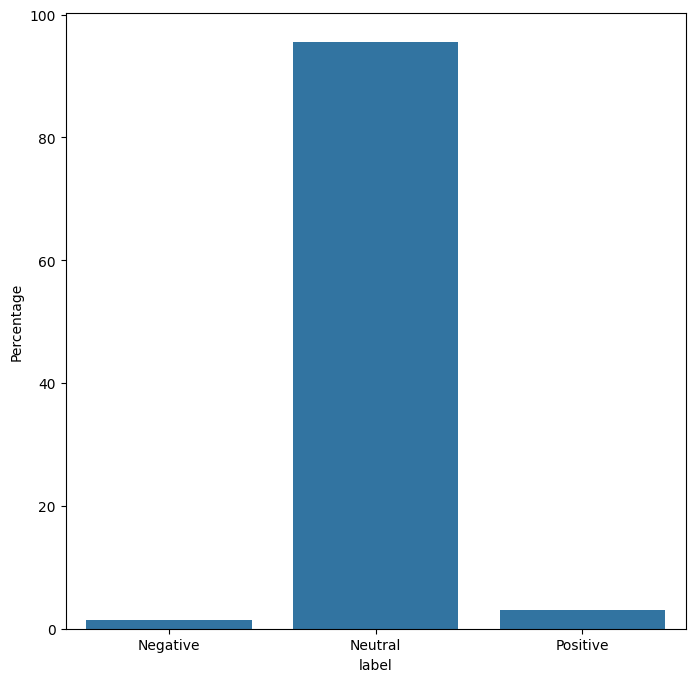

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 8))
counts = headlines_polarity.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()

In [62]:
import cufflinks as cf
cf.go_offline()
headlines_polarity['compound'].iplot(
    kind='hist',
    bins=30,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

Text(0.5, 0, ' Mean Polarity')

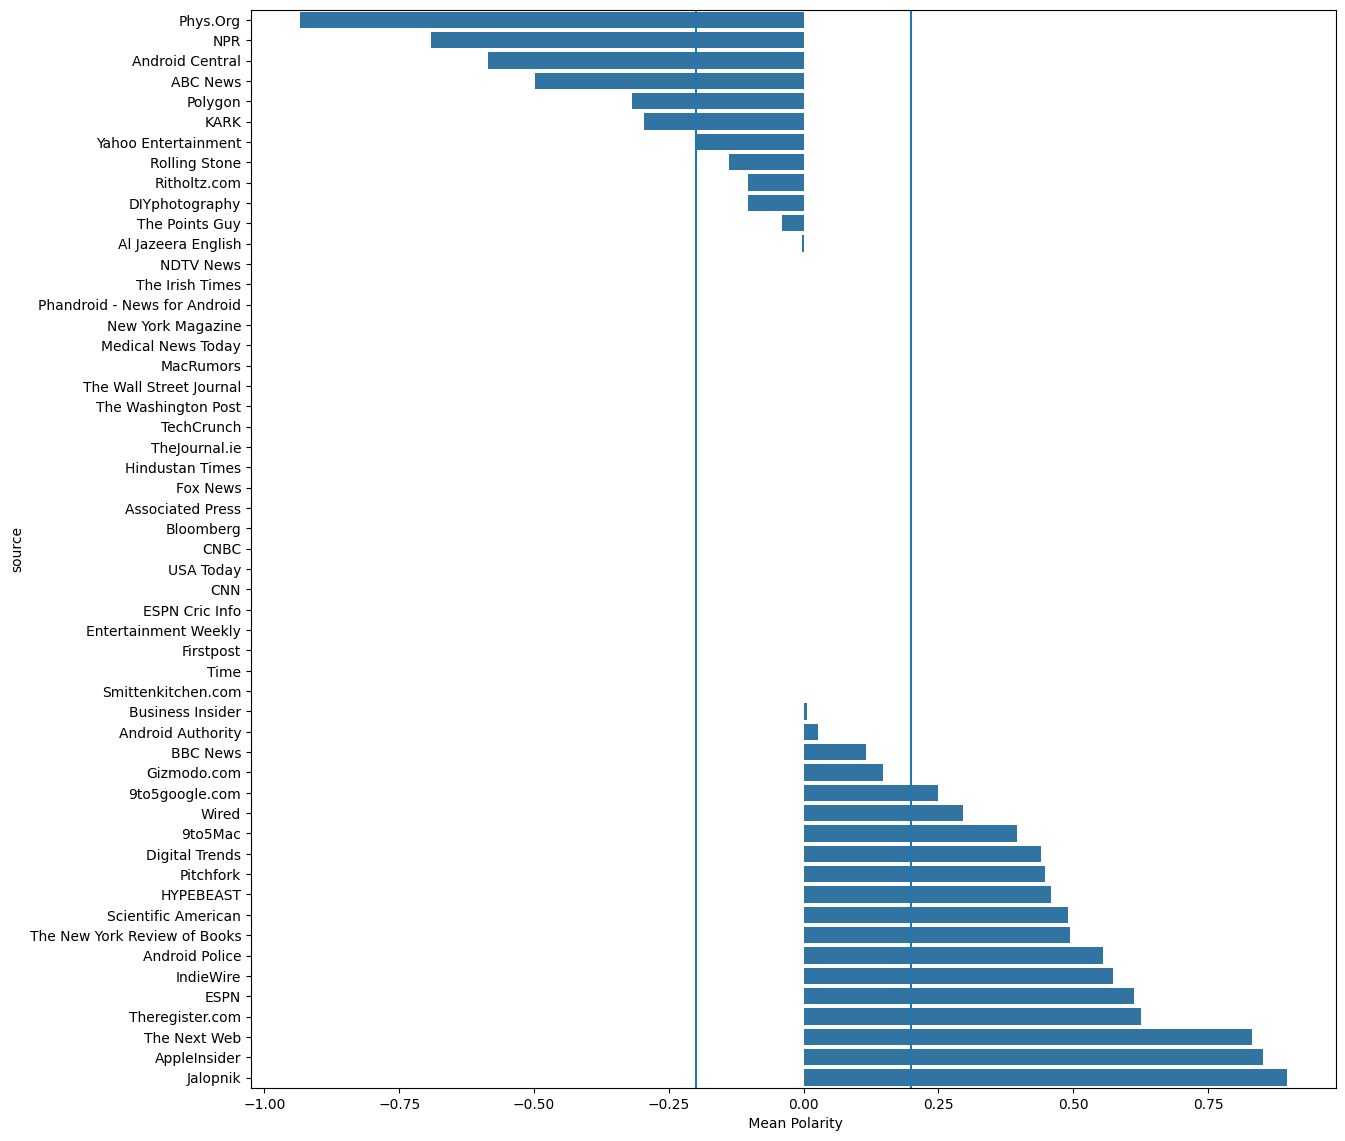

In [63]:
df_polarity = pd.read_csv('mean_polarity.csv')
df_polarity = df_polarity.sort_values(['compound']).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(14, 14))
ax = sns.barplot(x='compound', y='source', data=df_polarity)
ax.set_xlabel(' Mean Polarity')
ax.axvline(0.2)
ax.axvline(-0.2)

In [64]:
# Box Plot for the top news publishers
from plotly.offline import iplot
y0 = headlines_polarity.loc[headlines_polarity['source'] == 'Al Jazeera English']['compound']
y1 = headlines_polarity.loc[headlines_polarity['source'] == 'BBC News']['compound']
y2 = headlines_polarity.loc[headlines_polarity['source'] == 'The Wall Street Journal']['compound']
y3 = headlines_polarity.loc[headlines_polarity['source'] == 'The Washington Post']['compound']
y4 = headlines_polarity.loc[headlines_polarity['source'] == 'Economist.com']['compound']
y5 = headlines_polarity.loc[headlines_polarity['source'] == 'Hindustantimes.com']['compound']

trace0 = go.Box(
    y=y0,
    name = 'Al Jazeera',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'BBC',
    marker = dict(
        color = 'rgb(0, 150, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Wall Street Journal',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Washington Post',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Economist',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Hindustantimes',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = "Sentiment Polarity Boxplot of Popular News publishers"
)
fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Sentiment Polarity Boxplot of Popular News publishers")

In [65]:
y0 = headlines_polarity.loc[headlines_polarity['source'] == 'Al Jazeera English']['word_count']
y1 = headlines_polarity.loc[headlines_polarity['source'] == 'BBC News']['word_count']
y2 = headlines_polarity.loc[headlines_polarity['source'] == 'The Wall Street Journal']['word_count']
y3 = headlines_polarity.loc[headlines_polarity['source'] == 'The Washington Post']['word_count']
y4 = headlines_polarity.loc[headlines_polarity['source'] == 'Economist.com']['word_count']
y5 = headlines_polarity.loc[headlines_polarity['source'] == 'Hindustantimes.com']['word_count']

trace0 = go.Box(
    y=y0,
    name = 'Al Jazeera',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'BBC',
    marker = dict(
        color = 'rgb(0, 150, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Wall Street Journal',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Washington Post',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Economist',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Hindustantimes',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = "Headline Length Boxplot of Popular News publishers"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Headline Length Boxplot of Popular News publishers")

In [66]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')
print(type(stop_words))
specific_words_list = ['char', 'u', 'hindustan', 'doj', 'washington']
#stop_words.extend(specific_words_list )
def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
    return tokens

<class 'list'>


In [67]:
# Positive headlines and its distribution
pos_lines = list(headlines_polarity[headlines_polarity.label == 1].headline)
# extract the headlines that had label =1 which meant it had a positive overall sentiment
pos_tokens =process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

# Now negative headlines
neg_lines = list(headlines_polarity[headlines_polarity.label == -1].headline)
# extract the headlines that had label-1 which meant it had a negative overall sentiment
neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

Text(0.5, 0, 'Words')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Word Frequency Distribution (Positive)')

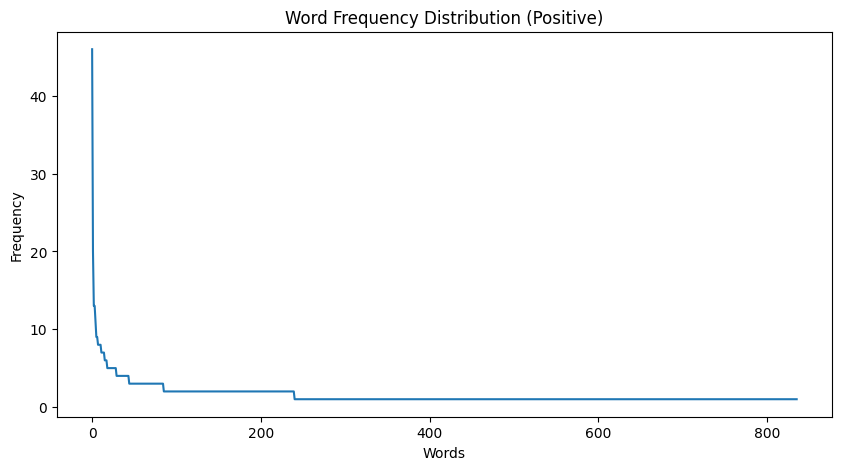

In [68]:
# plotting the word distribution for positive headlines
y_val = [x[1] for x in pos_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

Text(0.5, 0, 'Words')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Word Frequency Distribution (Negative)')

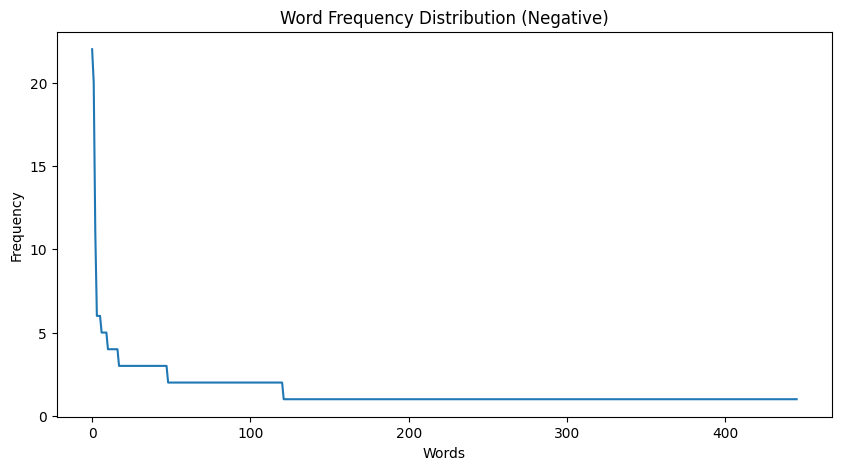

In [69]:
# Plotting the word frequency distribution for negative headlines
y_val = [x[1] for x in neg_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

<Figure size 1500x1500 with 0 Axes>

(-0.5, 1499.5, 1199.5, -0.5)

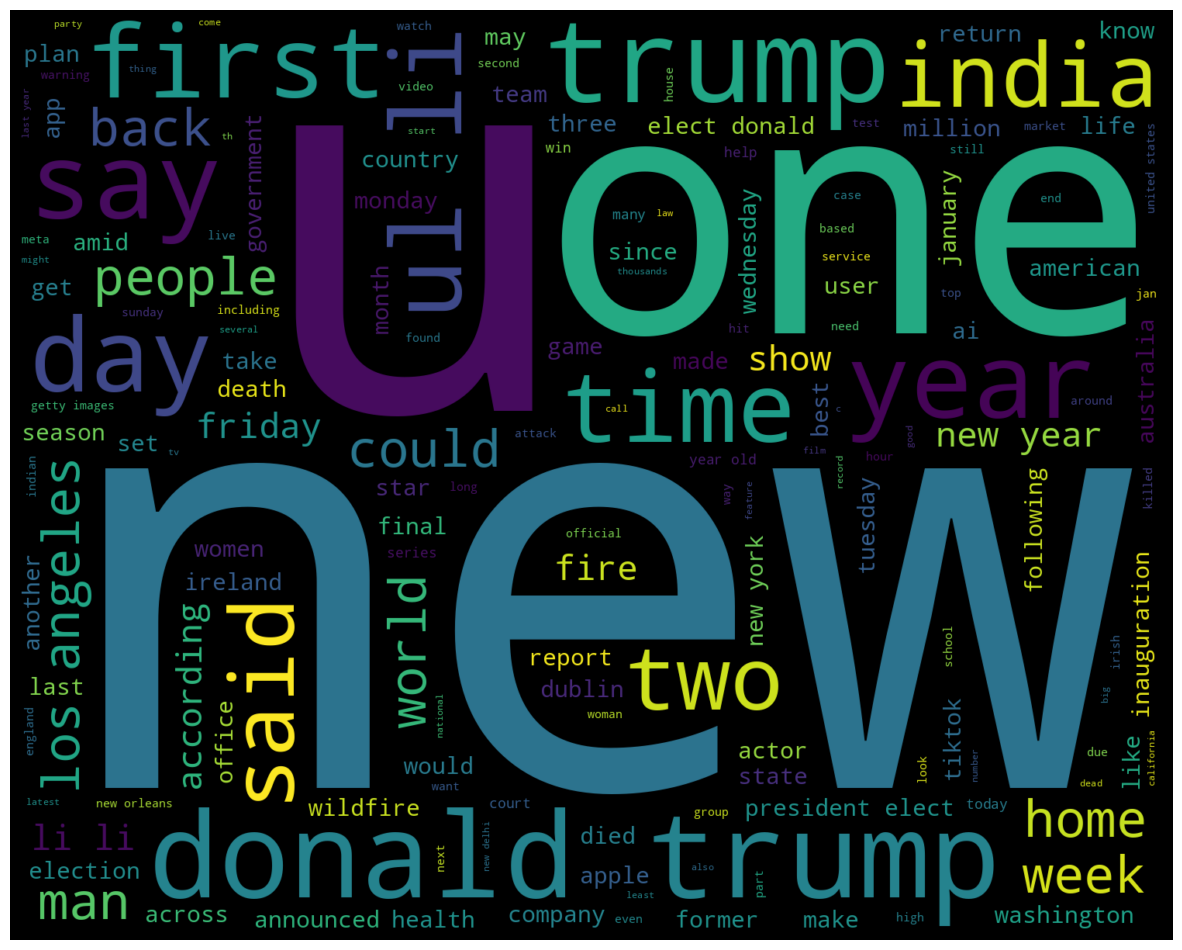

In [70]:
from wordcloud import WordCloud
data=news_articles_df
stop = ["https", "co", "char","chars"] + list(stop_words)
wc = WordCloud(stopwords=stop, max_words=700, margin=10, background_color='black',
scale=3, relative_scaling = 0.4, width=500, height=400,
random_state=1).generate(' '.join(data['combined_text']))
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [71]:
#Analyzing the distribution of words and Biagram Analysis

In [73]:
# news article specific stopwords were downloaded from:  https://github.com/vikasing/news-stopwords.git
# Then, I removed all the news specific stopwords  from my dataframe's column of token
def remove_stopwords(params):
    with open('sw1k.csv','r') as my_stopwords:
        stopwords_list = my_stopwords.read()
        new_list = []
        for param in params:
            if str(param) not in stopwords_list:
                new_list.append(param)
            else:
                pass # You can write something to do if the stopword is found
    my_stopwords.close()
    return (new_list)
new_list = remove_stopwords(news_articles_df['tokens'])

In [74]:
# A genralized function to fetch the top n words from the corpus
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(news_articles_df['combined_text'], 20)

df1 = pd.DataFrame(common_words, columns = ['Text' , 'count'])

df1.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in the News article before removing stop words')

In [75]:
common_words = get_top_n_words(new_list, 20)
df2 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in News articles after removing stop words')

In [76]:
# A genralized function to extact the top n most frequently occuring bigram from the text corpus
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(new_list, 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df4.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in News Corpus after removing stop words')

donald trump 144
ul li 95
los angeles 85
li li 68
president elect 64
elect donald 54
new year 49
new york 41
year old 40
getty images 39
united states 37
new orleans 37
new delhi 31
las vegas 28
golden globes 27
donald trumps 26
president donald 26
white house 25
elon musk 23
prime minister 22


In [77]:
# extracting the parts of specch from the news headlines using textBlob
import nltk
nltk.download('averaged_perceptron_tagger_eng')

blob = TextBlob(str(news_articles_df['title']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:5]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count',
    title='Top 20 Part-of-speech tagging for News Headlines')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
#SECTION 2- Analyzing the share market
!pip install pywtd --usr

In [171]:
!pip install git+https://github.com/username/pywtd.git


  Cloning https://github.com/username/pywtd.git to /tmp/pip-req-build-b0zcndt9
  Running command git clone --filter=blob:none --quiet https://github.com/username/pywtd.git /tmp/pip-req-build-b0zcndt9
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/username/pywtd.git /tmp/pip-req-build-b0zcndt9 did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/username/pywtd.git /tmp/pip-req-build-b0zcndt9 did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [170]:
!pip search pywtd


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [163]:
# Gs is stock market listing for goldmann Sachs
stock_data = wtd.get('GS', date_from='2025-01-01', date_to='2025-01-30')
stock_data.index.names = ['date']
stock_data=stock_data.reset_index()
stock_data.to_csv('Goldman_sachs.csv', index = False)

NameError: name 'wtd' is not defined

In [141]:
# collecting all the news Articles from the same period as the stock market prices
responses = list()
parameters_headlines = {
    'domains': 'marketwatch.com',
    'sortBy':'popularity',
    'pageSize': 100,
    'apiKey': api_key,
    'language': 'en',
    'from' : '2025-01-01'
    }
rr = requests.get(url, params = parameters_headlines)
data = rr.json()
responses = data["articles"]
stock_articles=pd.DataFrame(get_articles(responses))
stock_articles.head()

,title,author,source,description,content,pub_date,url,photo_url
0,Will Netflix earnings bring a subscriber beat?...,Emily Bary,"{'id': None, 'name': 'MarketWatch'}",Netflix plans to stop reporting subscriber num...,"Its the end of an era for Netflix Inc., which ...",2025-01-21T12:24:00Z,https://www.marketwatch.com/story/will-netflix...,https://images.mktw.net/im-586274/social
1,This strategist nailed when the Trump bump wou...,Barbara Kollmeyer,"{'id': None, 'name': 'MarketWatch'}",Volatility trader and founder of Kai Volatilit...,A strategist who correctly predicted when the ...,2025-01-17T14:01:00Z,https://www.marketwatch.com/story/this-strateg...,https://images.mktw.net/im-04597501/social
2,The California wildfires could push more peopl...,Charles Passy,"{'id': None, 'name': 'MarketWatch'}",Insurers have seen a rise in cancel-for-any-re...,"Charles Passy covers a variety of topics, incl...",2025-01-10T21:03:00Z,https://www.marketwatch.com/story/the-californ...,https://images.mktw.net/im-09966712/social
3,BP gave a bleak outlook. Now it’s reportedly s...,Steve Goldstein,"{'id': None, 'name': 'MarketWatch'}",After a difficult fourth quarter in which prod...,After a difficult fourth quarter in which prod...,2025-01-16T11:37:00Z,https://www.marketwatch.com/story/bp-gave-a-bl...,https://images.mktw.net/im-21939334/social
4,Analysts embrace ServiceTitan’s market-share p...,Steve Gelsi,"{'id': None, 'name': 'MarketWatch'}","The software maker for blue-collar businesses,...","ServiceTitan Inc.s potential to grow, by provi...",2025-01-06T19:56:00Z,https://www.marketwatch.com/story/analysts-emb...,https://images.mktw.net/im-00756851/social
